Review lecture 6

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Import the LinearRegression model from sklearn.linear_model
Split the dataset in Train and Test sets, uniformly at random.
Train Set with 80% of data and Test Set with 20% of data.

*** Here we are using all the three variables that we checked for last week 'GrLivArea','TotalBsmtSF','GarageArea'***
### Multi-variate regression

In [4]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Create a Linear Regression object
linreg = LinearRegression()
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData[['GrLivArea','TotalBsmtSF','GarageArea']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)


Train Set : (1168, 3) (1168, 1)
Test Set  : (292, 3) (292, 1)


LinearRegression()

Coefficients of the Linear Regression Model
Note that you CANNOT visualize the model as a line on a 2D plot, as it is a multi-dimensional surface.

In [5]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-17503.03497164]
Coefficients 	: a =  [[ 67.53534957  44.28528873 103.26060321]]


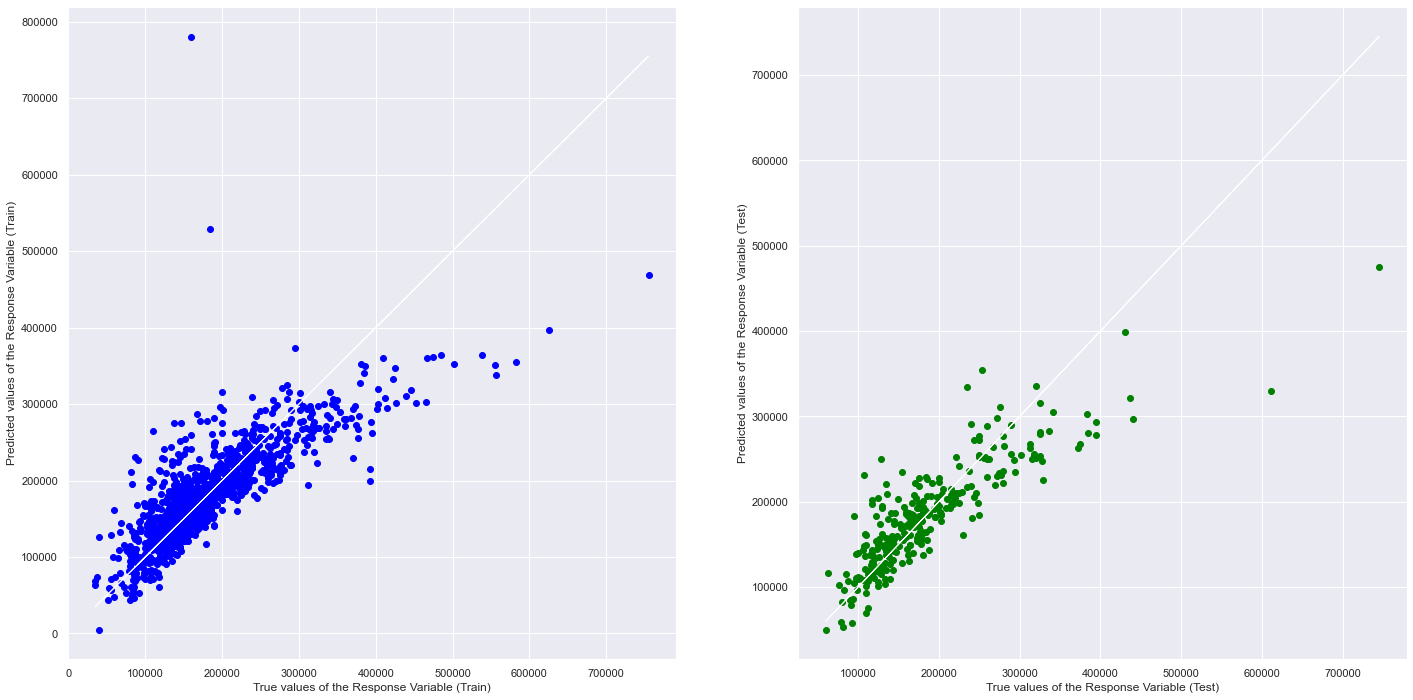

In [6]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


In [6]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6585412688394727
Mean Squared Error (MSE) on Train Set 	: 2140443980.6304805
Mean Squared Error (MSE) on Test Set 	: 2113249344.4798207


**Observation** : The model with `SalePrice` against all the variables `GrLivArea`, `TotalBsmtSF`, `GarageArea` is definitely better!     

However, does it mean that adding more variables into the model will always produce a better model? In which case would adding more variables make a model worse, and how would you spot that from the metrics we use on the train set and test set as above? Try out a few examples, and think about it.

Iam thinking of adding **LotArea** and  **OverallQual** into this and analyze 

In [7]:
houseData.SalePrice.corr(houseData.LotArea)


0.26384335387140573

In [8]:
houseData.SalePrice.corr(houseData.OverallQual)


0.7909816005838048

**OverallQual** has better correlation value and hence imapct will be better. So iam sticking with **OverallQual**

Train Set : (1168, 4) (1168, 1)
Test Set  : (292, 4) (292, 1)
Intercept 	: b =  [-88454.31455003]
Coefficients 	: a =  [[   39.54418072    26.08120744    59.58619427 25150.94774488]]


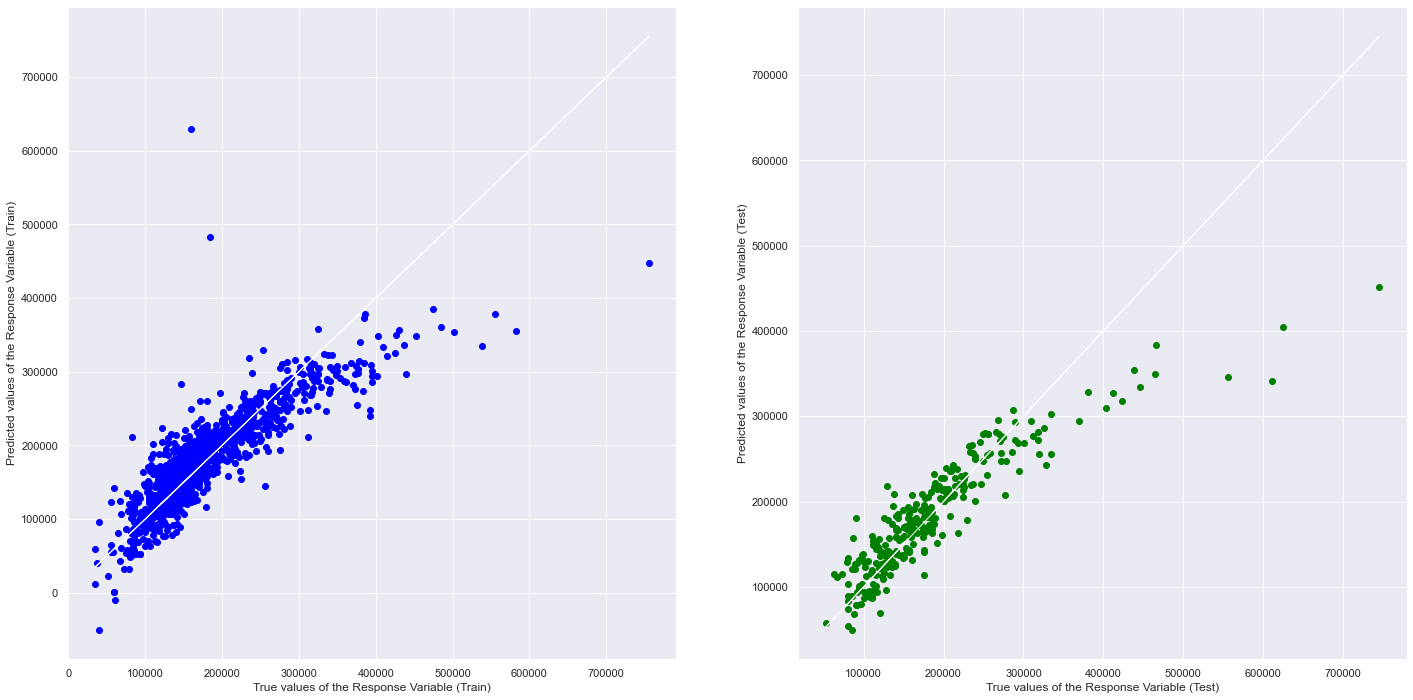

Explained Variance (R^2) on Train Set 	: 0.7443994890120189
Mean Squared Error (MSE) on Train Set 	: 1484393140.5354464
Mean Squared Error (MSE) on Test Set 	: 1795283159.0794177


In [87]:
# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData[['GrLivArea','TotalBsmtSF','GarageArea','OverallQual']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))



### Cross validation score to see the avrage score

In [88]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(linreg, X_train, y_train, cv=5).mean())

0.7359539901486144


### How will we know which are the best features to include

**PEARSONS CORRELATION COEFF will be a good choice**

Selecting the best **Feature values based on correlation** is used below

Lets take all the features in th train set (after removing objects and removing items as **NAN** with **0**.

In [37]:
houseData = pd.read_csv('train.csv')

from sklearn.model_selection import train_test_split


# load data set and Extract Response and all the Predictors
y = pd.DataFrame(houseData['SalePrice'])
# removing all categorical values 
houseDataNum = houseData.select_dtypes(exclude=["object"])
#removing NAN with zero (best policy will be to use the mean of that column)
houseDataNum = houseDataNum.fillna(0)

X = houseDataNum.drop(columns='SalePrice', axis=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



**How will we know which are the best features to include**
Lets use **SelectKBest** to find the best features and we are using regression to find out the best features

In [59]:
# importing Select K best and f_regression (to find correlation coefficient)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f ' % (i, fs.scores_[i]))
   
#what are the features
X.columns[fs.get_support()]


Feature 0: 1.185419 
Feature 1: 6.091230 
Feature 2: 55.153459 
Feature 3: 82.665172 
Feature 4: 1818.301673 
Feature 5: 3.832319 
Feature 6: 409.224475 
Feature 7: 393.695074 
Feature 8: 312.686088 
Feature 9: 222.234910 
Feature 10: 0.164527 
Feature 11: 44.537028 
Feature 12: 664.331627 
Feature 13: 652.926890 
Feature 14: 137.935998 
Feature 15: 0.997197 
Feature 16: 1128.568085 
Feature 17: 67.132219 
Feature 18: 1.030098 
Feature 19: 495.343051 
Feature 20: 103.613694 
Feature 21: 26.856822 
Feature 22: 22.632658 
Feature 23: 442.028412 
Feature 24: 338.098757 
Feature 25: 97.139248 
Feature 26: 830.333573 
Feature 27: 731.584547 
Feature 28: 111.314479 
Feature 29: 123.549602 
Feature 30: 22.874806 
Feature 31: 1.300086 
Feature 32: 17.853649 
Feature 33: 11.846683 
Feature 34: 0.578169 
Feature 35: 0.434182 
Feature 36: 0.174007 


C:\Users\smitha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

Intercept 	: b =  [-1123587.04955987]
Coefficients 	: a =  [[ 1.95113723e+04  1.58575989e+02  3.72995000e+02  2.84863206e+01
   1.77447212e+01  5.98968408e+00  2.30324520e+01  1.12468932e+01
   2.73156450e+01 -9.21281750e+02  2.31807118e+03  8.17676616e+03
   1.13022389e+04  1.01813259e+01 -4.40857176e-01]]


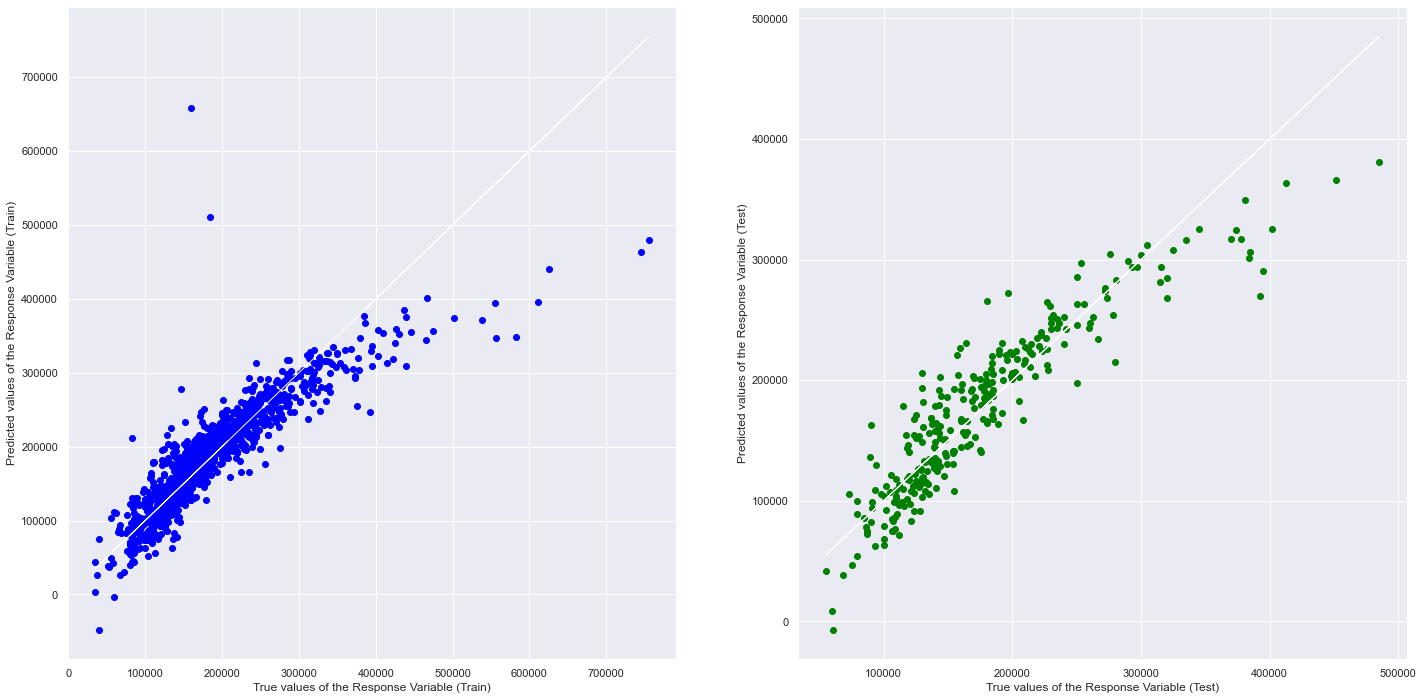

Explained Variance (R^2) on Train Set 	: 0.7789490199412518
Mean Squared Error (MSE) on Train Set 	: 1445378275.8965542
Mean Squared Error (MSE) on Test Set 	: 879604507.1410196


In [18]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error# Create a Linear Regression object

linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train_fs, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train_fs)
y_test_pred = linreg.predict(X_test_fs)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train_fs, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))


### What will be the R2 if i only select the best ones from the earlier set

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_regression, k=15)
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

#what are the features
X.columns[fs.get_support()]



C:\Users\smitha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'OpenPorchSF'],
      dtype='object')

Intercept 	: b =  [-1123587.04955987]
Coefficients 	: a =  [[ 1.95113723e+04  1.58575989e+02  3.72995000e+02  2.84863206e+01
   1.77447212e+01  5.98968408e+00  2.30324520e+01  1.12468932e+01
   2.73156450e+01 -9.21281750e+02  2.31807118e+03  8.17676616e+03
   1.13022389e+04  1.01813259e+01 -4.40857176e-01]]


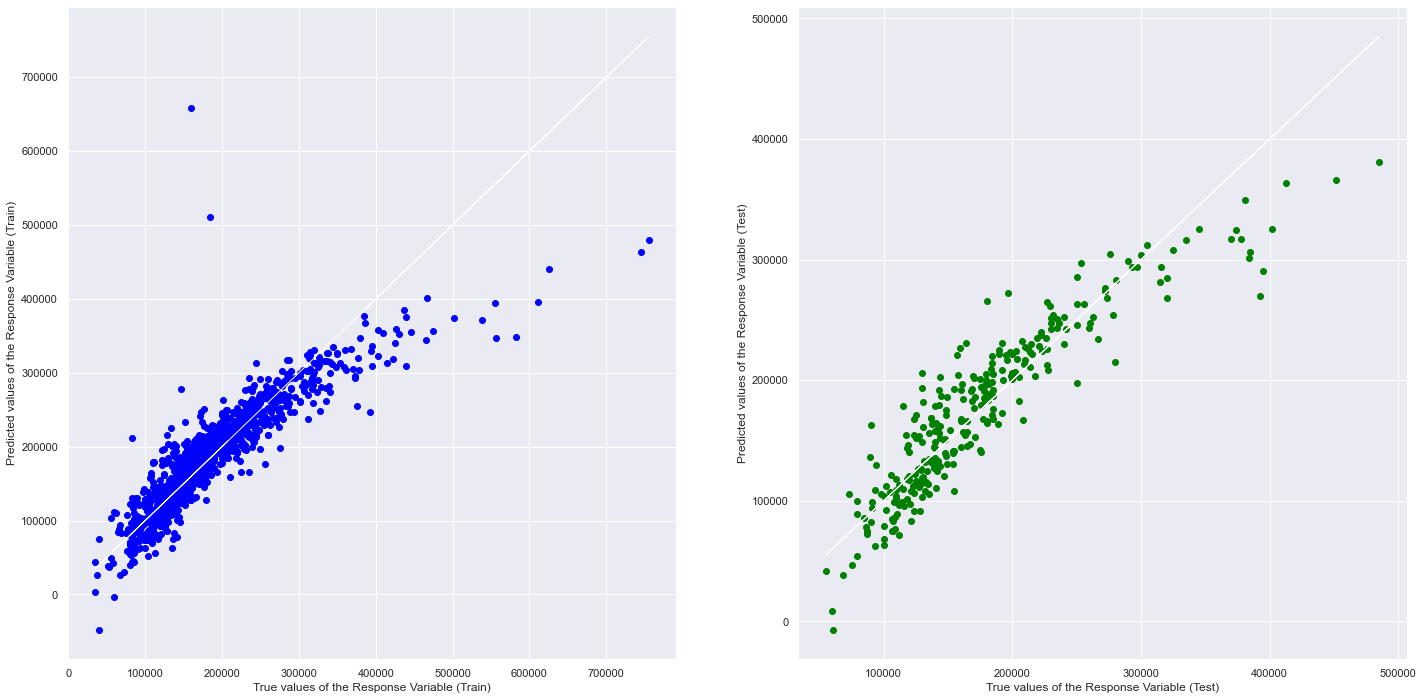

Explained Variance (R^2) on Train Set 	: 0.7789490199412518
Mean Squared Error (MSE) on Train Set 	: 1445378275.8965542
Mean Squared Error (MSE) on Test Set 	: 879604507.1410196


In [17]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error# Create a Linear Regression object

linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train_fs, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train_fs)
y_test_pred = linreg.predict(X_test_fs)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train_fs, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))